# **Entrega Proyecto Data Science Parte Final : Martinez German**

En este proyecto se analiza el dataset de calidad de vinos tintos, el cual contiene información química de aproximadamente 1.600 muestras de vino tinto, con 11 variables que describen sus características químicas y una variable categórica que representa la calidad sensorial del vino según evaluaciones de catadores expertos (en una escala del 0 al 10).

El proceso incluyó un Análisis Exploratorio de Datos (EDA), selección de características mediante métodos estadísticos y automáticos, entrenamiento de modelos de regresión y clasificación, evaluación con métricas estándar y conclusiones finales.
Los resultados muestran que variables como alcohol, sulphates y volatile acidity tienen una influencia significativa en la calidad percibida del vino.

# Objetivo:

El objetivo del análisis es identificar qué variables químicas influyen más en la calidad del vino y desarrollar un modelo predictivo capaz de estimar la calidad sensorial (clasificación).

# Hipotesis:


Las características fisicoquímicas del vino (como el contenido de alcohol, la acidez volátil y los sulfitos) contienen suficiente información estructural como para permitir que un modelo supervisado de clasificación prediga con precisión la categoría de calidad del producto.

# Contexto Comercial:

Este análisis sería útil para una bodega o empresa vinícola interesada en optimizar la calidad de sus vinos a partir del control de sus variables químicas.

**El modelo permite:**

• Identificar los factores más importantes que determinan la calidad.

• Detectar lotes de producción con riesgo de baja calidad antes de su evaluación sensorial.

• Reducir costos al predecir calidad sin depender exclusivamente de paneles de cata.

• Mejorar el proceso productivo ajustando acidez, sulfitos y alcohol al rango óptimo.

# Librerias Importadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data set importado "calidad devinos.csv"



In [2]:
from google.colab import files
uploaded = files.upload()

Saving calidaddevinos.csv to calidaddevinos.csv


# Lectura del dataset

In [3]:
import pandas as pd
df = pd.read_csv("calidaddevinos.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Descripcion de columnas del dataset

**Variables:**

* **fixed acidity / acidez fija** : Es el conjunto de ácidos orgánicos (como el tartárico, málico, cítrico y láctico) que no se evaporan con facilidad y que provienen principalmente de la uva y de la fermentación.

* **volatile acidity / acidez volátil** : Es la acidez que se desprende fácilmente por evaporación. Está compuesta principalmente por el ácido acético (vinagre), pero también incluye otros ácidos como el láctico, fórmico, butírico y propiónico.

* **citric  acid / ácido cítrico** : Es un acidificante que se utiliza para corregir la acidez de mostos y vinos, principalmente blancos, para darles mayor frescura y estabilidad. Al ser un antioxidante, también ayuda a estabilizar el color y a prolongar la vida útil del vino

* **residual sugar / azúcar residual** : Es el azúcar natural de la uva (glucosa y fructosa) que no se convierte en alcohol durante la fermentación y permanece en el vino.

* **chlorides / cloro** : En el vino se refieren a compuestos de cloro, que pueden ser naturales o resultado de un problema de contaminación. Si el vino tiene un olor a corcho o humedad, es probable que se deba a la reacción entre compuestos clorados (como los de productos de limpieza) y hongos presentes en el corcho o la barrica.

* **free sulfur dioxide / dióxido de azufre** : Es la forma activa del sulfuroso en el vino que actúa como conservante y antioxidante. Su función principal es proteger el vino de la oxidación, evitando que se alteren sus aromas y color, y también inhibe el crecimiento de levaduras y bacterias no deseadas que pueden deteriorar el vino

* **total sulfur dioxide / dióxido de azufre total** : Es la suma del SO₂ libre y el SO₂ combinado. El SO₂ libre es la parte activa que protege el vino contra la oxidación y los microorganismos, actuando como conservante y antioxidante

* **density / densidad** : Es la relación entre su masa y su volumen, y es una medida clave en la viticultura para determinar el contenido de azúcar del mosto y prever el grado alcohólico

* **pH / : acidez** Es una medida de su acidez, que indica el nivel de concentración de iones de hidrógeno en la bebida.

* **sulphates / sulfitos** : Son compuestos químicos, principalmente dióxido de azufre (SO₂), que se utilizan como conservantes y antioxidantes para proteger el vino de la oxidación y el deterioro microbiano.

* **alcohol** : Se refiere a un equilibrio objetivo entre sus componentes (fruta, acidez, taninos, alcohol), que se refleja en su complejidad, profundidad y persistencia. Está influenciada por factores objetivos como el terruño (suelo, clima), la uva, las técnicas de vinificación y la enología, así como por las condiciones de maduración y conservación.
* **quality / calidad** : Se refiere a una combinación de características objetivas y subjetivas, siendo el equilibrio entre sus componentes (acidez, taninos, alcohol) y la intensidad y complejidad de sus sabores y aromas los indicadores clave. También se considera la seguridad alimentaria y se puede medir mediante la certificación de origen (como las Denominaciones de Origen Protegidas o DOPs en la UE) y la evaluación de críticos profesionales


# **Estadistica Descriptiva**




In [4]:
df.shape

(1599, 12)

El dataset obtenido de la base de datos posee 1599 filas y 12 columnas, de las cuales 11 (once) son variables independientes a analizar y 1 (una) corresponde a una variable dependiente

In [5]:
df.duplicated().value_counts()

,count
False,1359
True,240


El dataset presenta un total de 240 valores duplicados

# Verificamos si el data set tiene valores nulos

In [6]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   object 
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 150.0+ KB


El mismo no presenta valores nulos.

Exploratoria de columnas numericas

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.20000,15.900
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.64000,1.580
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.42000,1.000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.60000,15.500
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.09000,0.611
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.00000,72.000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.00000,289.000
density,1598.0,2.147498,9.351959,0.99007,0.9956,0.99675,0.99783,100.369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.40000,4.010
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.73000,2.000


Se puede visualizar que el dataset presenta variables atipicas o irreales las podriamos clasificar como "Outliers reales" y "Outliers imposibles".

***Outliers imposibles:***

**density / densidad:** Los valores tipicos que deberia tener esta variable cuando se trata de vinos deberian estar entre 0.990 - 1.005

Valor maximo del dataset: 100.369


*   Se puede deber a un error de tipado.



***Outliers reales:***

**alcohol:** Con respecto a la graduacion de alcohol en vinos los porcentajes de graduacion suelen estar en 8% - 15%

Valor maximo del dataset: 14.9

* Esta dentro de los valores normales.

**residual sugar / azúcar residual:** Normalmente el valor de esta columna podria ir de 0 - 50

Valores maximos del dataset: 75%=2.6 y max=15.5

* Puede deberse a vinos dulces o semidulces.

**chlorides / cloro:** El rango de valores esta en 0.07-0.09

Valor maximo del dataset: 0.611

* Este valor puede deberse comunmente a contaminación salina.

**free sulfur dioxide / dióxido de azufre:** Los valores normales van de 20 - 60

Valores maximos del dataset: 72

* Hay vinos con altos niveles de SO₂ por conservación.

**total sulfur dioxide / dióxido de azufre total:** El rango en este valor deberia estar entre los 10 - 400

Valores maximos del dataset: 289

 * Es comun que se deba al proceso conservación.

 **volatile acidity / acidez volátil:** este valor posee un promedio de 0.52

 Valores maximos del dataset: 1.58

* Estos valores podrian significar vinos mas avinagrados.


**Nota:** Los *"Outliers imposibles"* se eliminaran para que el modelo arroje datos correctos.

In [18]:
df = df[df["density"] < 2]

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


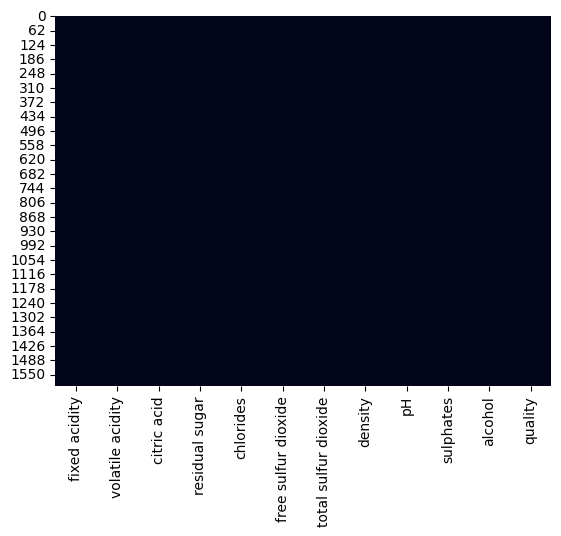

In [7]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False)
plt.show()


# Histograma (grafico univariable)

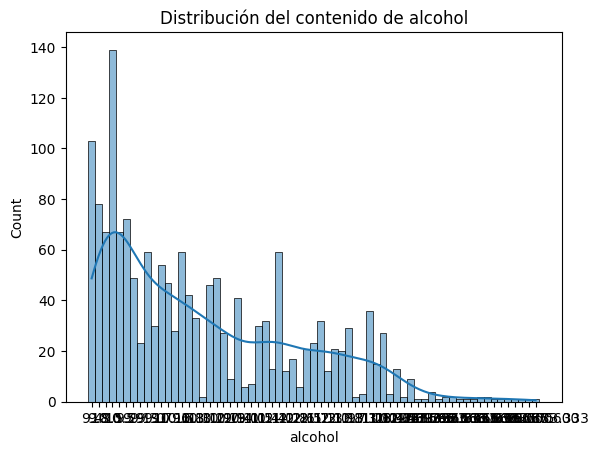

In [8]:
sns.histplot(df["alcohol"], kde=True)
plt.title("Distribución del contenido de alcohol")
plt.show()

# Boxplot (grafico univariable)

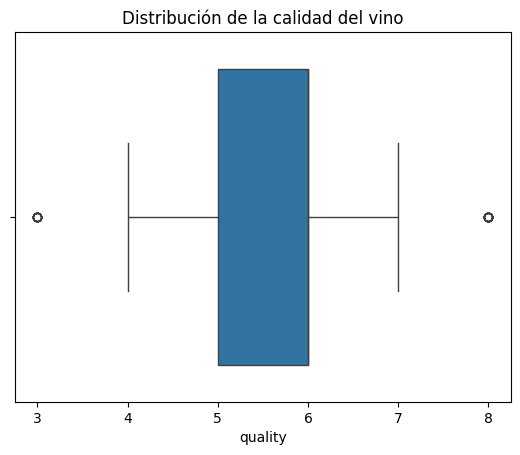

In [9]:
sns.boxplot(x=df["quality"])
plt.title("Distribución de la calidad del vino")
plt.show()

# Grafico de dispersión (Grafico bivariable)

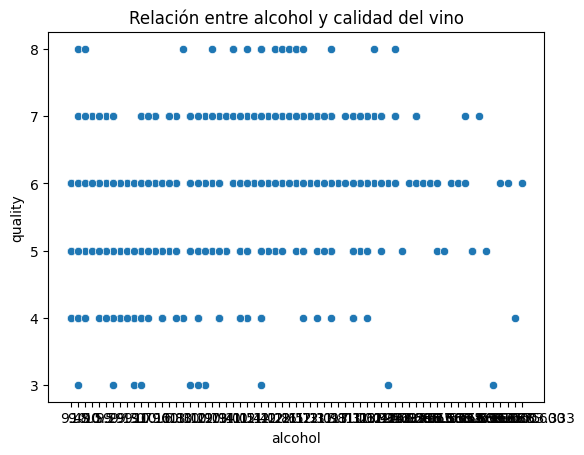

In [10]:

sns.scatterplot(x="alcohol", y="quality", data=df)
plt.title("Relación entre alcohol y calidad del vino")
plt.show()

Verificamos de que todas las columnas numéricas sean realmente numéricas

In [11]:
df = df.apply(pd.to_numeric, errors='coerce')

Verificamos los tipos de datos



In [12]:
print(df.dtypes.head())

fixed acidity       float64
volatile acidity    float64
citric acid         float64
residual sugar      float64
chlorides           float64
dtype: object


# Pairplot (Grafico multivariable)

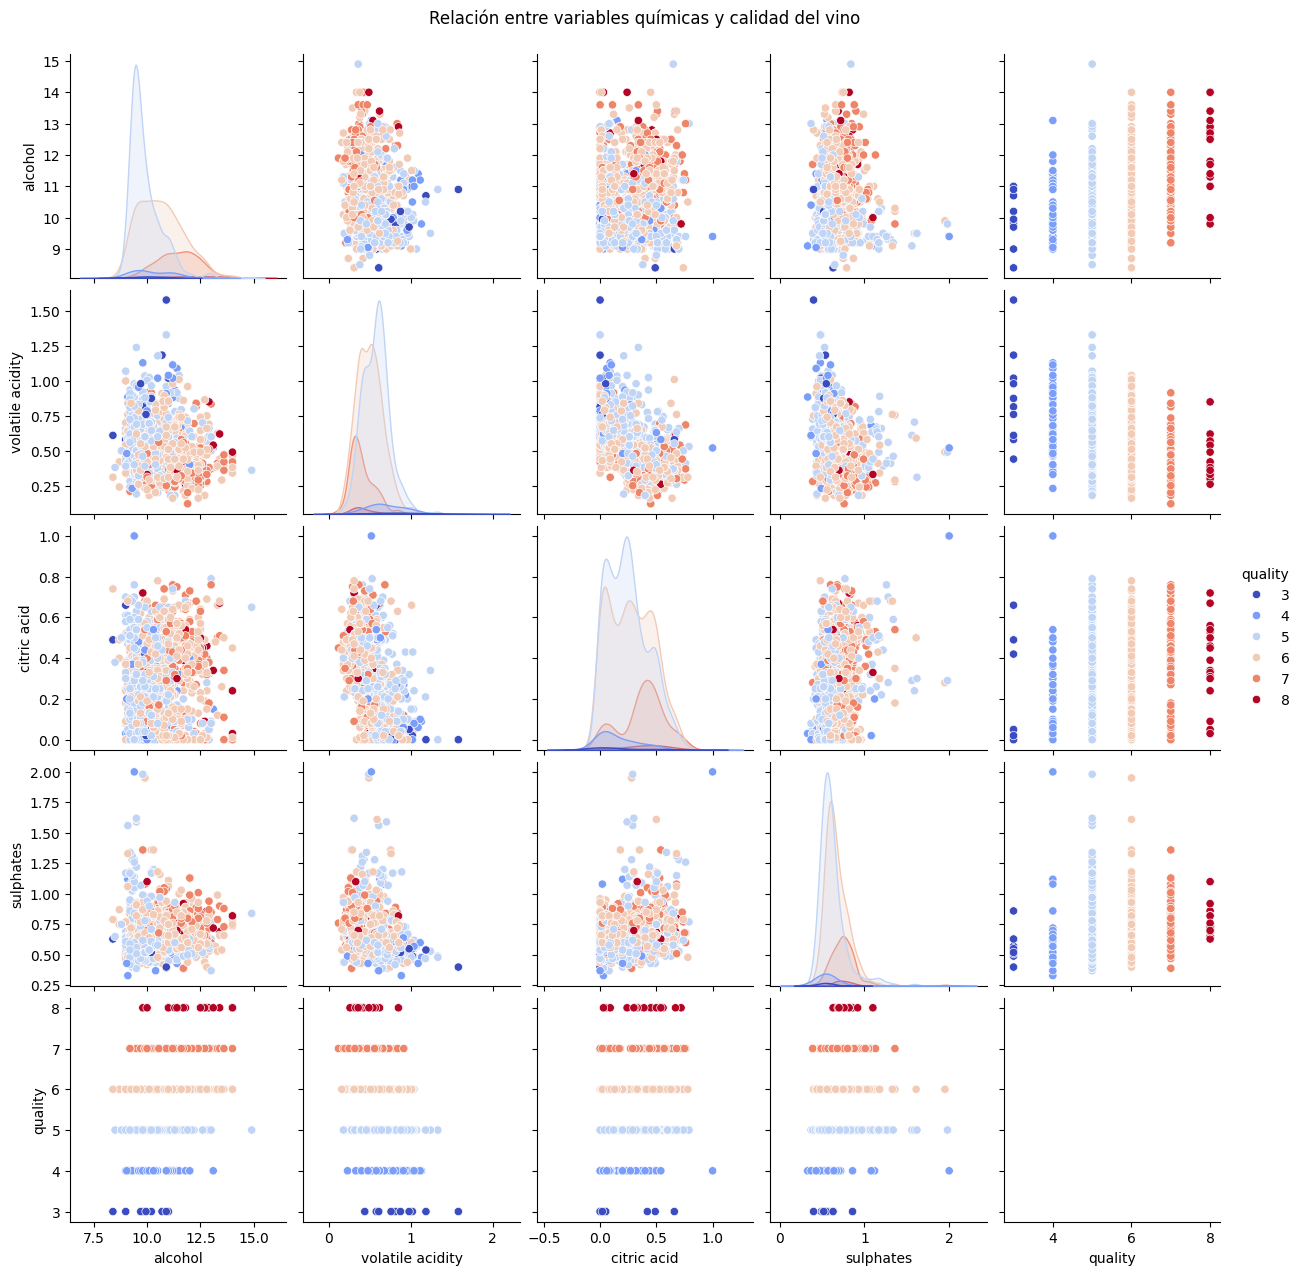

In [13]:
sns.pairplot(df, vars=["alcohol", "volatile acidity", "citric acid", "sulphates", "quality"],
             hue="quality", palette="coolwarm", diag_kind="kde")
plt.suptitle("Relación entre variables químicas y calidad del vino", y=1.02)
plt.show()

Buscamos una correlacion entre las variables del dataset

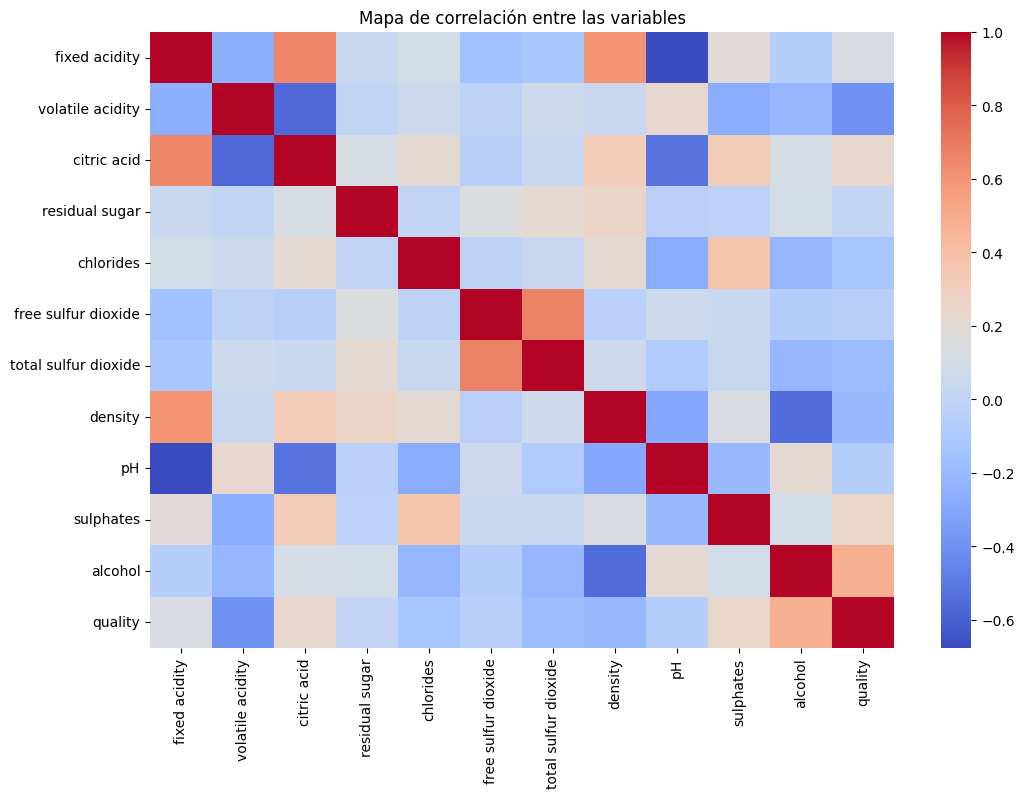

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Mapa de correlación entre las variables")
plt.show()

**Distribucion de la variable objetivo**:

El mapa de correlación muestra que las variables con mayor relación con la **calidad** son:

* ***alcohol:*** A mayor grado porcentual de este indicador mejor calidad de vino (correlación positiva)  
* ***volatile acidity:*** A menores cantidades la calidad del vino decae ( correlacion negativa)

# Muestras de vino por cada nivel de calidad

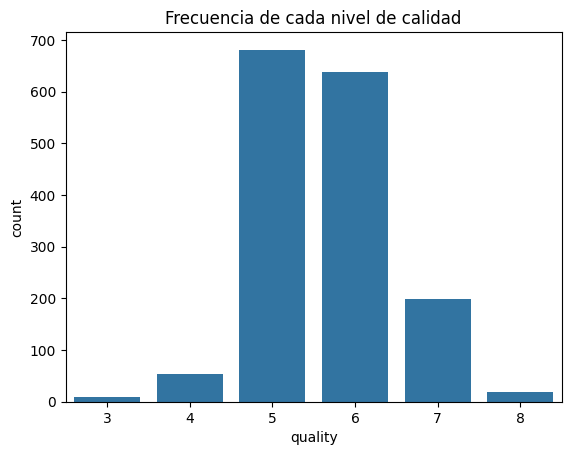

In [17]:
sns.countplot(x=df["quality"])
plt.title("Frecuencia de cada nivel de calidad")
plt.show()

**La variable objetivo presenta un desbalance moderado, con la mayoría de las observaciones en los niveles 5 y 6, lo que puede afectar el desempeño de modelos de clasificación. Es importante tenerlo en cuenta para la evaluación de métricas**



# Random Forest.



In [40]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("quality", axis=1)
y = df["quality"]

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

features = importances.head(5).index
features

Index(['label', 'alcohol', 'sulphates', 'volatile acidity',
       'total sulfur dioxide'],
      dtype='object')

El análisis de importancia de variables mediante un modelo RandomForestRegressor muestra que el contenido de alcohol (28.5%) es el factor más determinante en la calidad del vino, seguido por los sulfitos (13.4%) y la acidez volátil (12.7%). Estas tres variables concentran la mayor parte del poder predictivo del modelo.
Las demás variables químicas presentan una relevancia moderada o baja, indicando que si bien contribuyen al modelo, no son tan críticas para explicar la variabilidad en la calidad.

In [33]:
features = importances.sort_values(ascending=False).head(5).index

# **Entrenamiento del modelo**

Elegí el método de selección por importancia de características usando RandomForestClassifier debido a que es un modelo robusto, no lineal y que devuelve la importancia de cada variable basada en reducción de impureza. Esto permite evaluar qué variables aportan más a la predicción sin asumir relaciones lineales.

Modelo de clasificacion

In [42]:
features = importances.head(5).index
features

Index(['label', 'alcohol', 'sulphates', 'volatile acidity',
       'total sulfur dioxide'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[features]
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy: 0.8827361563517915
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.12      0.22         8
           5       0.95      1.00      0.97       140
           6       0.87      0.92      0.89       113
           7       0.71      0.62      0.67        40
           8       0.33      0.20      0.25         5

    accuracy                           0.88       307
   macro avg       0.64      0.48      0.50       307
weighted avg       0.87      0.88      0.87       307



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Conclusión del análisis:
El modelo arrojo una precisión del 88%.

Sin embargo, este valor puede ser engañoso debido a que tenemos en este dataset un fuerte desbalance en la variable objetivo.
El modelo predice correctamente las clases más frecuentes (Calidades 5 y 6), arrojando F1-scores por arriba de 0.90
Por otro lado, las clases minoría (3,4 y 8) presentan desempeños muy bajos, con F1-scores cercanos a 0, ya que el modelo no genero predicciones para las mismas.
Esto produce advertencias de métricas indefinidas.

En resumen: El modelo funciona bien predecir vinos de calidad media, pero falla para clasificar vinos de calidad extrema. Esto nos indica la necesidad de técnicas adicionales para manejar el desbalance de clases.
